# **Installing all the useful libraries**

In [ ]:
!pip install streamlit
import cv2
import numpy as np
import imutils
import easyocr
from matplotlib import pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.2 MB 5.2 MB/s 
     |████████████████████████████████| 182 kB 56.8 MB/s 
     |████████████████████████████████| 164 kB 54.8 MB/s 
     |████████████████████████████████| 4.7 MB 57.0 MB/s 
     |████████████████████████████████| 78 kB 6.4 MB/s 
     |████████████████████████████████| 237 kB 50.8 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 51 kB 5.1 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=e9df56c62aed5cae3e7aac8cae85b6ea3ea903fe5e4333722d85325aea9173fb
  Stored in directory: /root/.cache/pip/wheels/19/09/72/3eb74d236bb48bd0f3c6c3c83e4e0c5bbfcbcad7c6c3539db8
Successfully built validators


In [ ]:
import streamlit as st
st.title('My title')


  command:

    streamlit run /usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2022-12-13 18:04:55.906 
  command:

    streamlit run /usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

## **Reading the image - making it grey scale and blur**

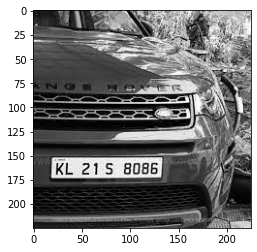

In [ ]:

img = cv2.imread('sample.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# **Applying filter over image and edges of localization**

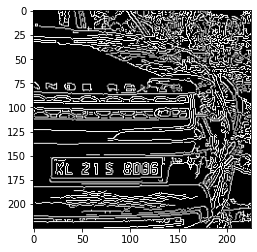

In [ ]:
filter = cv2.bilateralFilter(gray , 11, 17 ,17)
edge = cv2.Canny(filter  ,30 , 200)
plt.imshow(cv2.cvtColor(edge , cv2.COLOR_BGR2RGB))

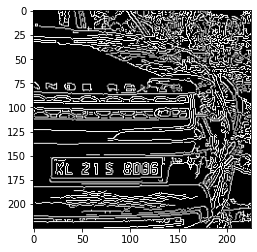

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))


# **Finding Contours and Apply Mask**

In [ ]:
points = cv2.findContours(edged.copy() , cv2.RETR_TREE  ,cv2.CHAIN_APPROX_SIMPLE)
contours  = imutils.grab_contours(points)
contours  = sorted(contours , key = cv2.contourArea , reverse = True)[:10]

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
location

array([[[ 18, 171]],

       [[132, 172]],

       [[135, 158]],

       [[ 18, 152]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)


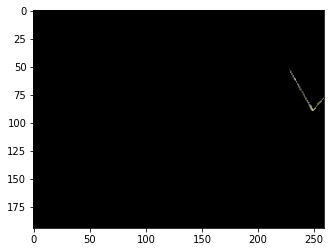

In [ ]:
plt.imshow(cv2.cvtColor(new_image , cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

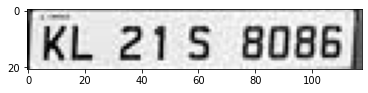

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


In [ ]:
read = easyocr.Reader(['en'])
result = read.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[1, 1], [115, 1], [115, 21], [1, 21]], 'KL 21 5 8086', 0.8713267261127486)]

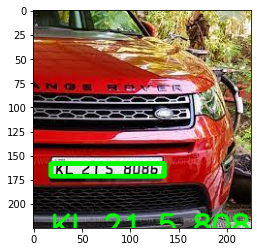

In [ ]:

text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
